In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd

In [2]:
try:
    cab_data = pd.read_csv('C:/Users/alyss/Desktop/DG_Week2/DataSets/Cab_Data.csv')
    city_data = pd.read_csv('C:/Users/alyss/Desktop/DG_Week2/DataSets/City.csv')
    customer_ID = pd.read_csv('C:/Users/alyss/Desktop/DG_Week2/DataSets/Customer_ID.csv')
    transaction_ID = pd.read_csv('C:/Users/alyss/Desktop/DG_Week2/DataSets/Transaction_ID.csv')
    holidays = pd.read_csv('C:/Users/alyss/Desktop/DG_Week2/DataSets/US_Holiday_Dates.csv')
except: 
    print('File not found.')

In [3]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [7]:
holidays.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [8]:
holidays_list = holidays['Date']

In [9]:
cab_city = cab_data.merge(right=city_data, how='inner', on='City')
cab_city.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [10]:
cab_city_transaction = cab_city.merge(right=transaction_ID, how='inner', on="Transaction ID")
cab_city_transaction.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Card


In [11]:
cab_df = customer_ID.merge(right=cab_city_transaction, how='inner', on='Customer ID')
cab_df.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Payment_Mode
0,29290,Male,28,10813,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",Card
1,29290,Male,28,10813,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",Cash
2,29290,Male,28,10813,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",Card
3,27703,Male,27,9237,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",Card
4,27703,Male,27,9237,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",Card


In [12]:
duplicated = cab_df[cab_df.duplicated()]
print(duplicated)

Empty DataFrame
Columns: [Customer ID, Gender, Age, Income (USD/Month), Transaction ID, Date of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip, Population, Users, Payment_Mode]
Index: []


In [13]:
cab_df.rename(columns = {'Customer ID': 'Customer_ID', 
                         'Income (USD/Month)': 'Income',
                        'Transaction ID': 'Transaction_ID',
                        'Date of Travel': 'Date_of_Travel',
                        'KM Travelled': 'KM_Traveled',
                        'Price Charged': 'Price_Charged',
                        'Cost of Trip': 'Cost_of_Trip'}, inplace=True)
cab_df.head()

,Customer_ID,Gender,Age,Income,Transaction_ID,Date_of_Travel,Company,City,KM_Traveled,Price_Charged,Cost_of_Trip,Population,Users,Payment_Mode
0,29290,Male,28,10813,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",Card
1,29290,Male,28,10813,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",Cash
2,29290,Male,28,10813,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",Card
3,27703,Male,27,9237,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",Card
4,27703,Male,27,9237,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",Card


In [14]:
cab_df['Profit'] = cab_df['Price_Charged'] - cab_df['Cost_of_Trip']
cab_df.head()

,Customer_ID,Gender,Age,Income,Transaction_ID,Date_of_Travel,Company,City,KM_Traveled,Price_Charged,Cost_of_Trip,Population,Users,Payment_Mode,Profit
0,29290,Male,28,10813,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",Card,57.3150
1,29290,Male,28,10813,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",Cash,281.2772
2,29290,Male,28,10813,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",Card,194.6480
3,27703,Male,27,9237,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",Card,23.6660
4,27703,Male,27,9237,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",Card,253.9808


In [15]:
datetime= []
for i in range(0,len(cab_df)):
    xl_date = cab_df['Date_of_Travel'][i]
    datetime_date = (xlrd.xldate_as_datetime(xl_date,0))
    datetime.append(datetime_date.date())

In [16]:
cab_df['Date_of_Travel'] = datetime
cab_df.head()

,Customer_ID,Gender,Age,Income,Transaction_ID,Date_of_Travel,Company,City,KM_Traveled,Price_Charged,Cost_of_Trip,Population,Users,Payment_Mode,Profit
0,29290,Male,28,10813,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",Card,57.3150
1,29290,Male,28,10813,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",Cash,281.2772
2,29290,Male,28,10813,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",Card,194.6480
3,27703,Male,27,9237,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",Card,23.6660
4,27703,Male,27,9237,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",Card,253.9808


In [17]:
cab_df.dtypes

Customer_ID         int64
Gender             object
Age                 int64
Income              int64
Transaction_ID      int64
Date_of_Travel     object
Company            object
City               object
KM_Traveled       float64
Price_Charged     float64
Cost_of_Trip      float64
Population         object
Users              object
Payment_Mode       object
Profit            float64
dtype: object

In [18]:
is_holiday = []
for i in range(0, len(cab_df)):
    if cab_df['Date_of_Travel'][i] in holidays_list:
        is_holiday.append(1)
    else:
        is_holiday.append(0)

In [19]:
cab_df['Is_Holiday'] = is_holiday
cab_df.head()

,Customer_ID,Gender,Age,Income,Transaction_ID,Date_of_Travel,Company,City,KM_Traveled,Price_Charged,Cost_of_Trip,Population,Users,Payment_Mode,Profit,Is_Holiday
0,29290,Male,28,10813,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",Card,57.3150,0
1,29290,Male,28,10813,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",Cash,281.2772,0
2,29290,Male,28,10813,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",Card,194.6480,0
3,27703,Male,27,9237,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",Card,23.6660,0
4,27703,Male,27,9237,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",Card,253.9808,0


In [20]:
cab_df['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [21]:
year =[]
for i in range(0, len(cab_df)):
    year_1 = cab_df['Date_of_Travel'][i].year
    year.append(year_1)
cab_df['Year'] = year

In [22]:
cab_df.head()

,Customer_ID,Gender,Age,Income,Transaction_ID,Date_of_Travel,Company,City,KM_Traveled,Price_Charged,Cost_of_Trip,Population,Users,Payment_Mode,Profit,Is_Holiday,Year
0,29290,Male,28,10813,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",Card,57.3150,0,2016
1,29290,Male,28,10813,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",Cash,281.2772,0,2018
2,29290,Male,28,10813,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",Card,194.6480,0,2018
3,27703,Male,27,9237,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",Card,23.6660,0,2016
4,27703,Male,27,9237,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",Card,253.9808,0,2018


In [23]:
cab_df['Profit_Percentage'] = (cab_df['Profit'] / cab_df['Cost_of_Trip']) * 100

In [24]:
cab_df['Profit_Per_KM'] = cab_df['Profit'] / cab_df['KM_Traveled']

In [25]:
class_list = []
for i in range(0, len(cab_df)):
    if cab_df['Income'][i] > 15000:
        class_list.append('>15000')
    elif cab_df['Income'][i] < 2500:
        class_list.append('<2500')
    else:
        class_list.append('2500-15000')
cab_df['Class'] = class_list

In [26]:
print(min(cab_df['Age']))

18


In [27]:
age_group_list = []
for i in range(0, len(cab_df)):
    if cab_df['Age'][i] > 60:
        age_group_list.append('61+')
    elif cab_df['Age'][i] <=25:
        age_group_list.append('18-25')
    elif cab_df['Age'][i] <=40:
        age_group_list.append('26-40')
    else:
        age_group_list.append('41-60')
cab_df['Age_Group'] = age_group_list

In [28]:
yellow_cab_df = cab_df[cab_df['Company'] == 'Yellow Cab']
pink_cab_df = cab_df[cab_df['Company'] == 'Pink Cab']

In [29]:
yellow_cab_df.head()

,Customer_ID,Gender,Age,Income,Transaction_ID,Date_of_Travel,Company,City,KM_Traveled,Price_Charged,...,Population,Users,Payment_Mode,Profit,Is_Holiday,Year,Profit_Percentage,Profit_Per_KM,Class,Age_Group
1,29290,Male,28,10813,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,...,"814,885","24,701",Cash,281.2772,0,2018,88.612790,10.739870,2500-15000,26-40
2,29290,Male,28,10813,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,...,"814,885","24,701",Card,194.6480,0,2018,32.582415,4.574571,2500-15000,26-40
4,27703,Male,27,9237,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,...,"814,885","24,701",Card,253.9808,0,2018,54.371732,6.981330,2500-15000,26-40
5,27703,Male,27,9237,10324737,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,...,"814,885","24,701",Cash,50.8912,0,2018,58.155523,8.234822,2500-15000,26-40
8,28712,Male,53,11242,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,...,"814,885","24,701",Card,210.0920,0,2016,42.510846,5.305354,2500-15000,41-60


In [30]:
pink_cab_df.head()

,Customer_ID,Gender,Age,Income,Transaction_ID,Date_of_Travel,Company,City,KM_Traveled,Price_Charged,...,Population,Users,Payment_Mode,Profit,Is_Holiday,Year,Profit_Percentage,Profit_Per_KM,Class,Age_Group
0,29290,Male,28,10813,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,...,"814,885","24,701",Card,57.315,0,2016,18.274427,1.882266,2500-15000,26-40
3,27703,Male,27,9237,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,...,"814,885","24,701",Card,23.666,0,2016,7.067558,0.826904,2500-15000,26-40
6,27703,Male,27,9237,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,...,"814,885","24,701",Card,25.096,0,2018,17.681458,1.874235,2500-15000,26-40
7,28712,Male,53,11242,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,...,"814,885","24,701",Cash,27.568,0,2016,28.236644,3.049558,2500-15000,41-60
11,28020,Male,23,23327,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,...,"814,885","24,701",Cash,25.798,0,2016,7.337273,0.777751,>15000,18-25


In [31]:
pink_profit = sum(pink_cab_df['Profit'])
yellow_profit = sum(yellow_cab_df['Profit'])
pink_rides = len(pink_cab_df)
yellow_rides = len(yellow_cab_df)
pink_ppr = pink_profit / pink_rides
yellow_ppr = yellow_profit / yellow_rides

In [32]:
profit_df = pd.DataFrame()
profit_df['Company'] = ['Yellow Cab', 'Pink_Cab']
profit_df['Total_Rides'] = [yellow_rides, pink_rides]
profit_df['Profit'] = [round(yellow_profit, 2), round(pink_profit,2)]
profit_df['Profit Per Ride'] = [yellow_ppr, pink_ppr]

In [33]:
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
#pd.reset_option('display.float_format')

In [34]:
display(profit_df)

,Company,Total_Rides,Profit,Profit Per Ride
0,Yellow Cab,274681,44020373.17,160.259986
1,Pink_Cab,84711,5307328.32,62.652174


In [35]:
pp_pivot = pd.pivot_table(cab_df, values ='Profit_Percentage', index='Year', columns='Company', aggfunc=np.mean)
display(pp_pivot)

Company,Pink Cab,Yellow Cab
Year,,
2016,27.910304,57.214209
2017,27.319440,57.244999
2018,21.727509,48.679429


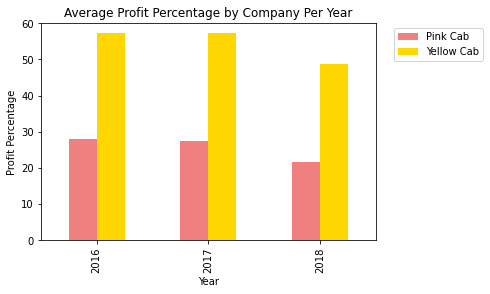

In [36]:
pp_pivot.plot(kind='bar', color=['lightcoral', 'gold'])
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Average Profit Percentage by Company Per Year')
plt.ylabel('Profit Percentage')
plt.show()

In [37]:
pp_city_pivot = pd.pivot_table(cab_df, values ='Profit_Percentage', index='City', columns='Company', aggfunc=np.mean)
display(pp_city_pivot)

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,22.366576,44.345863
AUSTIN TX,33.124570,42.639859
BOSTON MA,20.682036,20.991244
CHICAGO IL,14.062613,22.053429
DALLAS TX,7.834718,66.155995
DENVER CO,11.961548,49.940618
LOS ANGELES CA,23.113694,39.375101
MIAMI FL,33.004664,44.901656
NASHVILLE TN,14.243584,24.621837


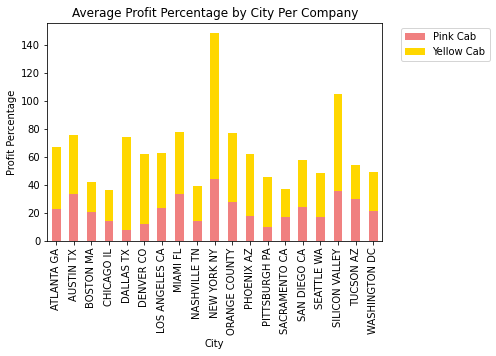

In [38]:
pp_city_pivot.plot(kind='bar', color=['lightcoral', 'gold'], stacked=True)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Average Profit Percentage by City Per Company')
plt.ylabel('Profit Percentage')
plt.show()

In [39]:
pp_pivot = pd.pivot_table(cab_df, values ='Profit_Per_KM', index='Year', columns='Company', aggfunc=np.mean)
display(pp_pivot)

Company,Pink Cab,Yellow Cab
Year,,
2016,3.026813,7.489847
2017,2.962883,7.494612
2018,2.350447,6.364805


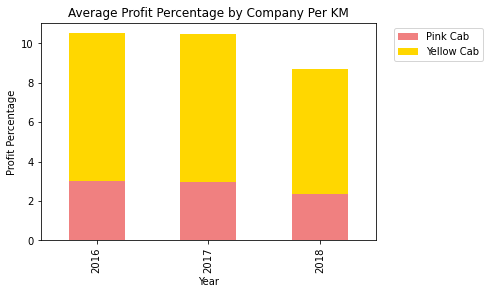

In [40]:
pp_pivot.plot(kind='bar', color=['lightcoral', 'gold'], stacked=True)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Average Profit Percentage by Company Per KM')
plt.ylabel('Profit Percentage')
plt.show()

In [41]:
yearly_profit_pivot = pd.pivot_table(cab_df, values ='Profit', index='Year', columns='Company', aggfunc=np.sum)
display(yearly_profit_pivot)

Company,Pink Cab,Yellow Cab
Year,,
2016,1713511.224,1.392700e+07
2017,2033654.908,1.657598e+07
2018,1560162.189,1.351740e+07


In [42]:
ypp= pd.DataFrame(yearly_profit_pivot)
ypp

Company,Pink Cab,Yellow Cab
Year,,
2016,1713511.224,1.392700e+07
2017,2033654.908,1.657598e+07
2018,1560162.189,1.351740e+07


<AxesSubplot:xlabel='Year', ylabel='Profit'>

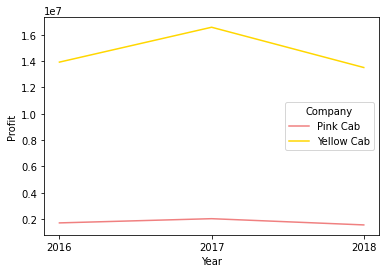

In [43]:
yearly_profit_pivot.plot(xticks=yearly_profit_pivot.index, ylabel='Profit', color=['lightcoral', 'gold'])

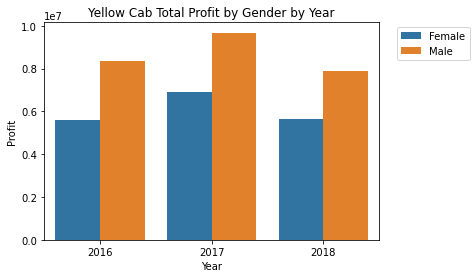

In [44]:
df = yellow_cab_df.groupby(['Year', 'Gender']).agg(sum_profit=("Profit", 'sum'))
df = df.reset_index()
sns.barplot(x="Year",y="sum_profit", hue="Gender",data=df)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Yellow Cab Total Profit by Gender by Year')
plt.ylabel('Profit')
plt.show()

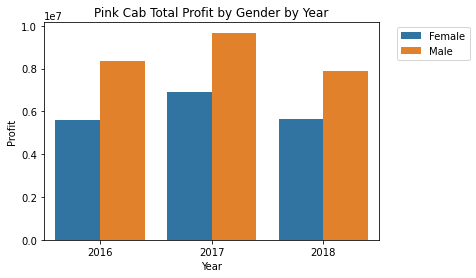

In [45]:
df2 = pink_cab_df.groupby(['Year', 'Gender']).agg(sum_profit=("Profit", 'sum'))
df2 = df.reset_index()
sns.barplot(x="Year",y="sum_profit", hue="Gender",data=df)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Pink Cab Total Profit by Gender by Year')
plt.ylabel('Profit')
plt.show()

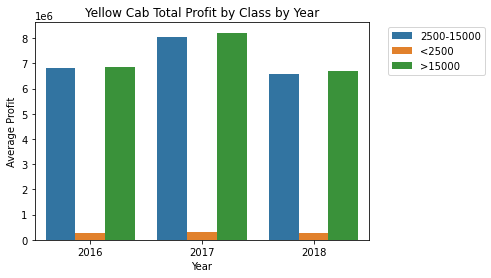

In [46]:
df3 = yellow_cab_df.groupby(['Year', 'Class']).agg(sum_profit=("Profit", 'sum'))
df3 = df3.reset_index()
sns.barplot(x="Year",y="sum_profit", hue="Class",data=df3)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Yellow Cab Total Profit by Class by Year')
plt.ylabel('Average Profit')
plt.show()

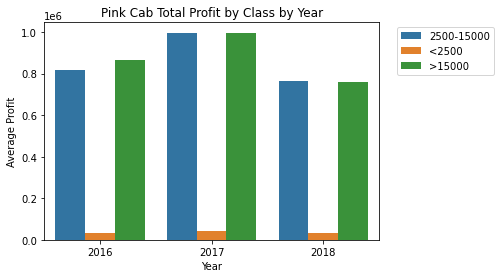

In [47]:
df4 = pink_cab_df.groupby(['Year', 'Class']).agg(sum_profit=("Profit", 'sum'))
df4 = df4.reset_index()
sns.barplot(x="Year",y="sum_profit", hue="Class",data=df4)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Pink Cab Total Profit by Class by Year')
plt.ylabel('Average Profit')
plt.show()

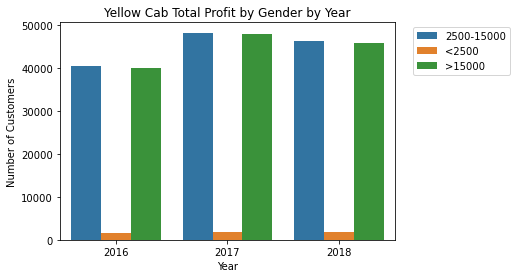

In [48]:
df5 = yellow_cab_df.groupby(['Year', 'Class']).agg(count=("Customer_ID", 'count'))
df5 = df5.reset_index()
sns.barplot(x="Year",y="count", hue="Class",data=df5)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Yellow Cab Total Customers by Class by Year')
plt.ylabel('Number of Customers')
plt.show()

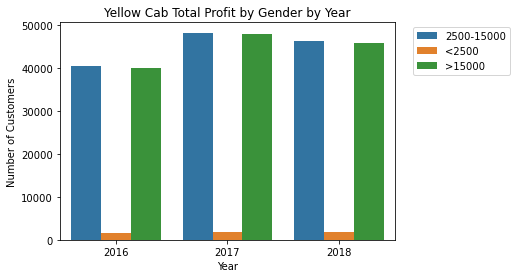

In [49]:
df6 = pink_cab_df.groupby(['Year', 'Class']).agg(count=("Customer_ID", 'count'))
df6 = df5.reset_index()
sns.barplot(x="Year",y="count", hue="Class",data=df6)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Yellow Cab Total Customers by Class by Year')
plt.ylabel('Number of Customers')
plt.show()

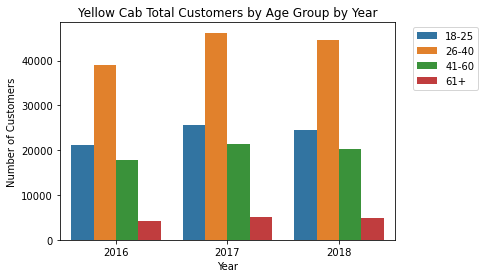

In [50]:
df7 = yellow_cab_df.groupby(['Year', 'Age_Group']).agg(count=("Customer_ID", 'count'))
df7 = df7.reset_index()
sns.barplot(x="Year",y="count", hue="Age_Group",data=df7)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Yellow Cab Total Customers by Age Group by Year')
plt.ylabel('Number of Customers')
plt.show()

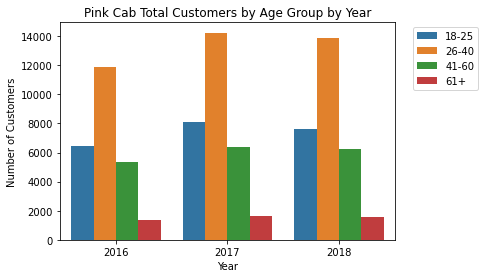

In [51]:
df8 = pink_cab_df.groupby(['Year', 'Age_Group']).agg(count=("Customer_ID", 'count'))
df8 = df8.reset_index()
sns.barplot(x="Year",y="count", hue="Age_Group",data=df8)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Pink Cab Total Customers by Age Group by Year')
plt.ylabel('Number of Customers')
plt.show()

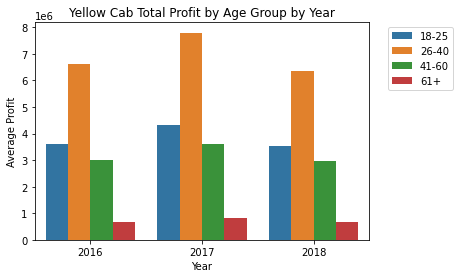

In [54]:
df9 = yellow_cab_df.groupby(['Year', 'Age_Group']).agg(sum_profit=("Profit", 'sum'))
df9 = df9.reset_index()
sns.barplot(x="Year",y="sum_profit", hue="Age_Group",data=df9)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Yellow Cab Total Profit by Age Group by Year')
plt.ylabel('Average Profit')
plt.show()

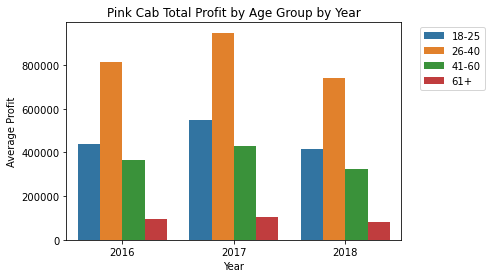

In [53]:
df10 = pink_cab_df.groupby(['Year', 'Age_Group']).agg(sum_profit=("Profit", 'sum'))
df10 = df10.reset_index()
sns.barplot(x="Year",y="sum_profit", hue="Age_Group",data=df10)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Pink Cab Total Profit by Age Group by Year')
plt.ylabel('Average Profit')
plt.show()

In [57]:
count_city_pivot = pd.pivot_table(cab_df, values ='Customer_ID', index='City', columns='Company', aggfunc=pd.Series.nunique)
display(count_city_pivot)

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,1322,2595
AUSTIN TX,1354,1914
BOSTON MA,2463,2997
CHICAGO IL,2859,3000
DALLAS TX,1118,2564
DENVER CO,1145,1681
LOS ANGELES CA,2996,2998
MIAMI FL,1480,2334
NASHVILLE TN,1356,965


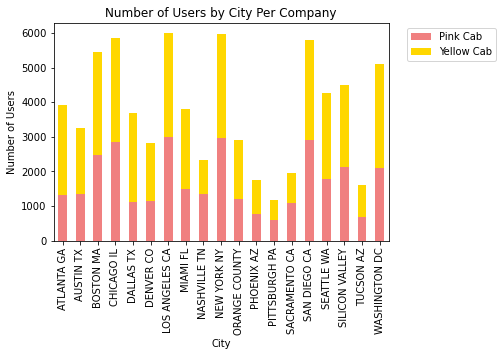

In [58]:
count_city_pivot.plot(kind='bar', color=['lightcoral', 'gold'], stacked=True)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Number of Users by City Per Company')
plt.ylabel('Number of Users')
plt.show()

In [66]:
count_city_df = pd.DataFrame(count_city_pivot)
#count_city_df  = df.reset_index(drop=True)
display(count_city_df)

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,1322,2595
AUSTIN TX,1354,1914
BOSTON MA,2463,2997
CHICAGO IL,2859,3000
DALLAS TX,1118,2564
DENVER CO,1145,1681
LOS ANGELES CA,2996,2998
MIAMI FL,1480,2334
NASHVILLE TN,1356,965
